In [44]:
# Tutorial is based on https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# Forged bank notes dataset

import pandas as pd
import numpy as np
import sklearn

from sklearn.datasets import load_breast_cancer
cancerSKLearnDataset = load_breast_cancer()
cancerdata = pd.DataFrame(data=cancerSKLearnDataset.data,  
                  columns=cancerSKLearnDataset.feature_names) 
cancerdata['class'] = cancerSKLearnDataset.target
cancerdata.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
cancerdata['class'].unique()

array([0, 1])

In [20]:
cancerdata['class'].value_counts()

class
1    357
0    212
Name: count, dtype: int64

In [21]:
cancerdata['class'].value_counts(normalize=True)

class
1    0.627417
0    0.372583
Name: proportion, dtype: float64

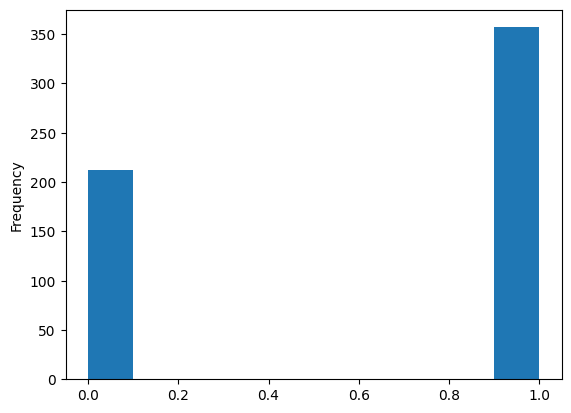

In [22]:
cancerdata['class'].plot.hist();

In [23]:
cancerdata.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [27]:
# predictors vs class
y = cancerdata['class']
X = cancerdata.drop('class', axis=1) # axis=1 means dropping from the column axis

In [28]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [29]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 455 samples for training and 114 samples for testing.


In [30]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',verbose=1)

In [31]:
svc.fit(X_train, y_train)

[LibSVM]................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

SVC(kernel='linear', verbose=1)

In [32]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



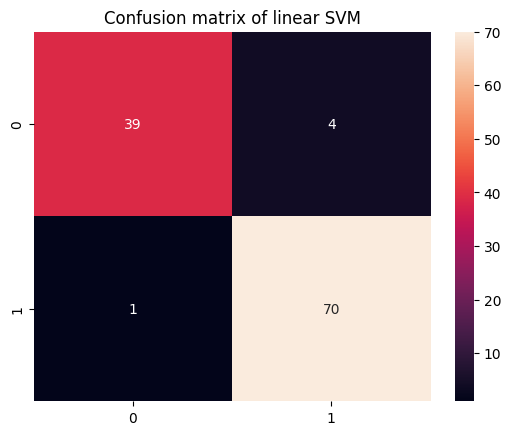

In [34]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       169
           1       0.97      0.99      0.98       286

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455



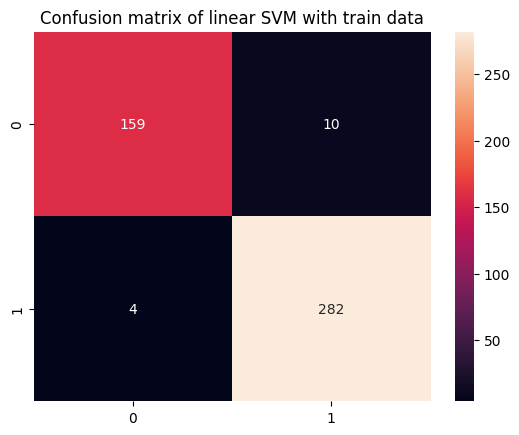

In [35]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [36]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [37]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': 1}

In [38]:
print(svc.n_support_)

[27 24]


In [39]:
print(svc.coef_)

[[ 1.25502362e+00  9.29619046e-02 -1.44014265e-01 -6.97860161e-04
  -2.56387414e-01 -2.80595775e-01 -6.75055359e-01 -3.99157939e-01
  -3.42945746e-01 -4.16351035e-02 -9.79384870e-02  1.60499599e+00
  -1.31056529e-02 -6.79865242e-02 -5.03740598e-02  6.08360489e-02
  -7.39855064e-02 -5.20313993e-02 -5.19898145e-02  1.66865008e-02
  -9.71381631e-02 -2.83227241e-01  1.91900038e-02 -5.57929558e-03
  -4.66965712e-01 -9.00305643e-01 -1.72490800e+00 -6.31042038e-01
  -1.19545791e+00 -1.24727547e-01]]


In [40]:
print(np.matmul(svc.dual_coef_,svc.support_vectors_))

[[ 1.25502362e+00  9.29619046e-02 -1.44014265e-01 -6.97860161e-04
  -2.56387414e-01 -2.80595775e-01 -6.75055359e-01 -3.99157939e-01
  -3.42945746e-01 -4.16351035e-02 -9.79384870e-02  1.60499599e+00
  -1.31056529e-02 -6.79865242e-02 -5.03740598e-02  6.08360489e-02
  -7.39855064e-02 -5.20313993e-02 -5.19898145e-02  1.66865008e-02
  -9.71381631e-02 -2.83227241e-01  1.91900038e-02 -5.57929558e-03
  -4.66965712e-01 -9.00305643e-01 -1.72490800e+00 -6.31042038e-01
  -1.19545791e+00 -1.24727547e-01]]


In [42]:
decision_function = svc.decision_function(X_test)
print(decision_function)

[  0.93104498  -9.01246196  -3.2384842    3.98354166   5.04532296
 -12.08830736 -13.50924983  -2.08883953   2.0795783    2.79737429
   1.41272237  -3.44775472   2.68698081  -1.18200727   3.4678507
  -2.46465264   3.57362398   6.21801726   6.04186017  -8.33382397
   1.07458773   2.99536158 -10.8060482    3.7736998    3.09373134
   4.57463818   3.48552376   3.47942256   3.02636135  -9.6353149
   3.15892046   4.29986007   3.16563185   2.41490167   4.32933612
   3.25899632  -2.73806922   3.54729552  -5.6862755    0.50231763
   4.20787985  -3.91516303   3.57748956   2.65234431   4.78704461
   1.52776381   4.59304646   4.27609578   1.19623871   3.70102512
  -4.72817281 -10.7287569    0.70121546   5.52069632   3.63040407
   2.12978474   4.17528201 -15.60339678   0.16341746   4.60894705
   2.35394757  -8.65682187 -13.34357204   1.02576594   3.5445148
   0.58136722  -6.30498263 -11.71484084   4.36507678   1.88574832
  -1.80323697  -4.82410564   4.08182756  -1.36433837   3.23604561
   3.272014  

In [43]:
# write parameters and data to file
weights=open("../data-linear-model/weights.txt","w")
bias=open("../data-linear-model/bias.txt","w")
xtestSample="../data-linear-model/xtest.txt"
ytestSample=open("../data-linear-model/ytest.txt","w")
ytestClassificationScore="../data-linear-model/yclassificationscore.txt"

np.savetxt(weights,svc.coef_, delimiter=' ')
np.savetxt(bias,svc.intercept_, delimiter=' ')
#np.savetxt(xtestSample,X_test.head(1).iloc[0].values, delimiter=' ')
with open(xtestSample, "w") as f1:
    for item in X_test.head(1).iloc[0].values:
        f1.write(str(item) + " ")

np.savetxt(ytestSample,y_test.head(1), delimiter=' ')
with open(ytestClassificationScore, "w") as f2:
    f2.write(str(decision_function[0]))


weights.close()
bias.close()
ytestSample.close()
f1.close()
f2.close()